## 1.Problem Statement

1.1.Project Overview

1.2. Objective definition.

- The project aims to build binary classifer to predict whether a customer will 'soon' churn-stop doing business with Syria Tel. The target variable is churn(1=customer churns/leaves, 0=customer stays).

- The goal is to identfify the risk early and minimize revenue loss from churn since acquiring new customers is expensive compared to retaining the ones the company aalready has.

- The department that will mainly benefit from this information will be the management as well as the marketing company of SyriaTel, who can use the data from the model to bring aboit targeted interventions like offers, improved service and other things to curb churning.

## Data Understanding
The dataset used for this project comes from SyriaTel. It has various customer information such as internaion plan, area, and customer service details.

For the target colum churn, the colums shows us whether the customer churned or did not churn.

The data also has a mix of different data types such as numerical and categorical variables.
On usage, we have data such as:
- total night calls
- total evening calls etc.

For plan, believing that SyriaTel is a telecom company, we also have data on:
- international plan
- voicemail plan.

## 2.0 Data Loading

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [123]:
# Loading the dataframe.
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


1.4. Data Inspection

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [125]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

- The data has 3,333 rows and 21 columns in total. The data has 16 numeric columns and 4 categorical columns.

- The data has the follwoing columns: state', 'account length', 'area code', 'phone number',
'international plan', 'voice mail plan', 'number vmail messages','total day minutes', 'total day calls', 'total day charge','total eve minutes', 'total eve calls', 'total eve charge','total night minutes', 'total night calls', 'total night charge','total intl minutes', 'total intl calls', 'total intl charge','customer service calls', 'churn'.

- The data also has no missing values as all the columns are filled.

The data also has no missing values as all the columns are filled.

## 3.Data Understanding(EDA)

3.1 Class Distribution

3.1.1 Churn on Categorical Column

C:\Users\user\AppData\Local\Temp\ipykernel_1608\2866442818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'churn', data=df,palette ='viridis')


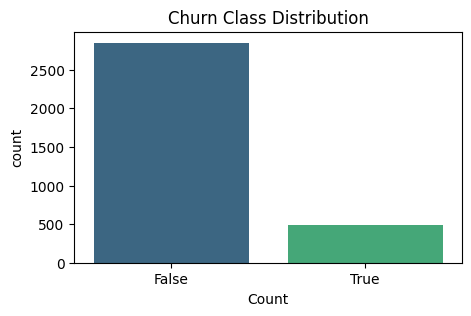

churn
False    85.51
True     14.49
Name: proportion, dtype: float64


In [126]:
# Undertandint the Target distribution
plt.figure(figsize=(5,3))
sns.countplot(x= 'churn', data=df,palette ='viridis')
plt.title('Churn Class Distribution')
plt.xlabel('Count')
plt.show()

print(df['churn'].value_counts(normalize=True).round(4)*100)

The proportion are quite imbalanced. Churn=1 had very low figure and churn=0 is quite high which might  a naive modelling.

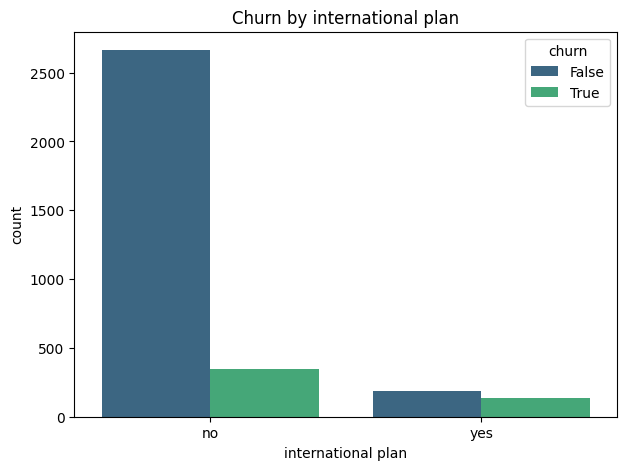

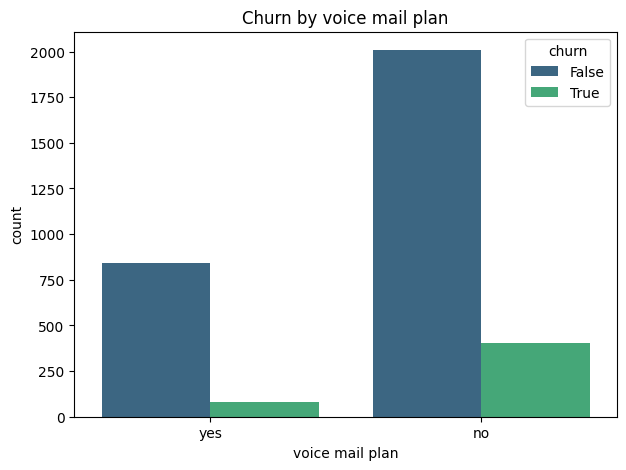

In [127]:
# Understanding categorical features versus churn
categorical_columns = ['international plan','voice mail plan']

for cols in categorical_columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x=cols, hue='churn', data=df,palette='viridis')
    plt.title(f"Churn by {cols}")
    plt.show()

- Most customers with with no international plan did not churn. Only a smaller group did churn.

- For customers with internation plan, which is small proportion of the customers, the once who churned are noticeably higher than those who did not.


 ['number vmail messages',
'total day minutes', 'total day calls','total eve minutes', 'total day charge',
'total eve calls','total night minutes', 'total night calls','total eve charge',
'total intl minutes', 'total intl calls','customer service calls','total night charge',
'total intl charge']

3.1.2.Churn Distribution among the numerical columns

In [171]:
num_cols_to_check= [
    'number vmail messages',
    'total day minutes',
    'total day calls',
    'total eve minutes',
    'total eve calls',
    'total night minutes',
    'total night calls',
    'total intl minutes',
    'total intl calls',
    'customer service calls'
]

for col in num_cols_to_check:
    df[f'{col}_bin'] = pd.qcut(df[col],q=5,duplicates='drop')


    print(f"\nChurn rate (%) by binned{col}:")
    print(
        df.groupby(f'{col}_bin', observed=True)['churn']
        .mean()
        .sort_values(ascending=False)
        .round(2) *100
    )


Churn rate (%) by binnednumber vmail messages:
number vmail messages_bin
(-0.001, 25.0]    15.0
(25.0, 51.0]      11.0
Name: churn, dtype: float64

Churn rate (%) by binnedtotal day minutes:
total day minutes_bin
(224.76, 350.8]     34.0
(-0.001, 134.74]    13.0
(134.74, 165.68]    10.0
(165.68, 194.0]      8.0
(194.0, 224.76]      7.0
Name: churn, dtype: float64

Churn rate (%) by binnedtotal day calls:
total day calls_bin
(117.0, 165.0]    18.0
(-0.001, 84.0]    14.0
(96.0, 106.0]     14.0
(106.0, 117.0]    14.0
(84.0, 96.0]      13.0
Name: churn, dtype: float64

Churn rate (%) by binnedtotal eve minutes:
total eve minutes_bin
(244.4, 363.7]      21.0
(213.44, 244.4]     15.0
(158.94, 188.0]     14.0
(188.0, 213.44]     13.0
(-0.001, 158.94]    10.0
Name: churn, dtype: float64

Churn rate (%) by binnedtotal eve calls:
total eve calls_bin
(105.0, 117.0]    15.0
(117.0, 170.0]    15.0
(84.0, 95.0]      14.0
(95.0, 105.0]     14.0
(-0.001, 84.0]    14.0
Name: churn, dtype: float64

Chu

Number vmail messages
- From the output, customers with 0-25 voicemail messages have 15% churn.
- Customers with 26-51 voicemail messages have a 11% churn rate.

Total day minutes
- Customers with very high daytime usage(>224.76) have a 34% churn- which is higher than others.

3.2 Correlation heatmap

In [128]:
# correlation heatmap (before)
numeric_columns = ['number vmail messages',
'total day minutes', 'total day calls','total eve minutes', 'total day charge',
'total eve calls','total night minutes', 'total night calls','total eve charge',
'total intl minutes', 'total intl calls','customer service calls','total night charge',
'total intl charge']

<Axes: >

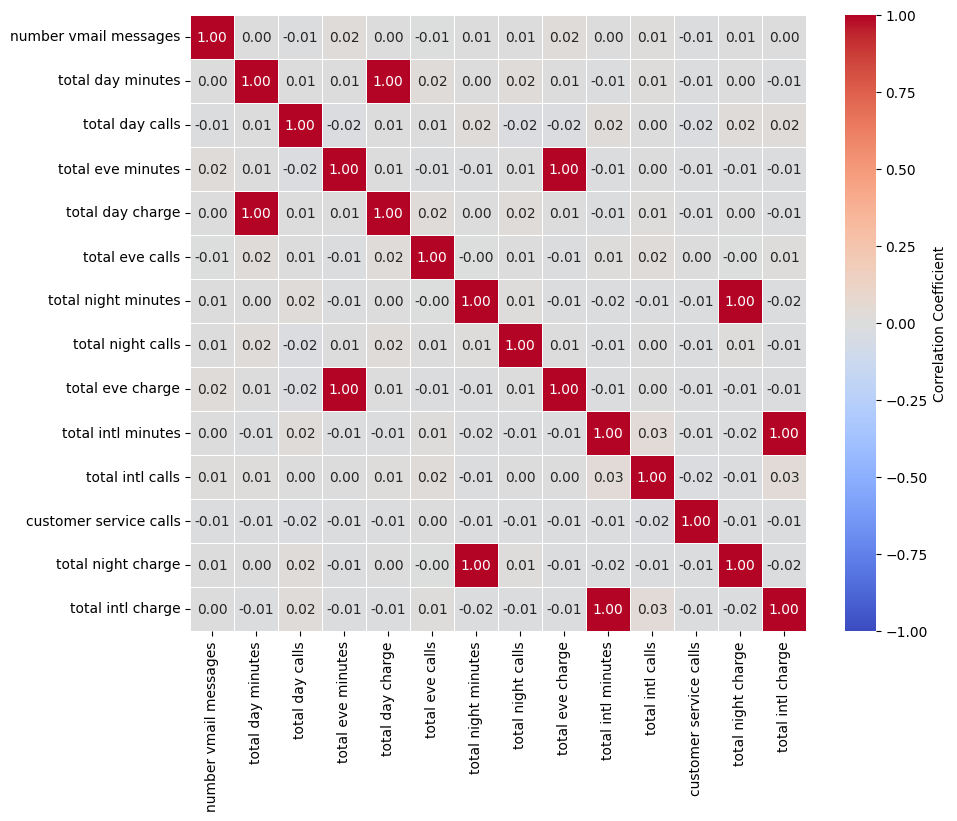

In [129]:
numeric_df = df[numeric_columns]

#calculating correlation matrix
corr_matrix_before = numeric_df.corr()

plt.figure(figsize=(10,8))   # to adjust size

sns.heatmap(
    corr_matrix_before,
    annot=True,
    fmt='.2f',
    cmap= 'coolwarm',
    vmin=-1,vmax=1,
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

- The anbove shows the correlation heat map for all the columns. Clearly from the heatmap, there are some columns which have a very weak correlation and therefore will not add any value to the model. For example, area code,account length,total day charge,total eve charge,total night charge,total intl charge. These columns are going to be dropped.

- For the categorical columns, two columns are dropped, phone number and state.

In [130]:
useless_columns = ["phone number","state", "area code","account length","total day charge","total eve charge","total night charge","total intl charge"]
df = df.drop(columns=useless_columns,errors='ignore')

In [131]:
# Identifying the numerical and categorical columns
numeric_columns = ['number vmail messages',
'total day minutes', 'total day calls','total eve minutes', 'total eve calls','total night minutes', 'total night calls','total intl minutes', 'total intl calls','customer service calls']

categorical_columns = ['international plan','voice mail plan']

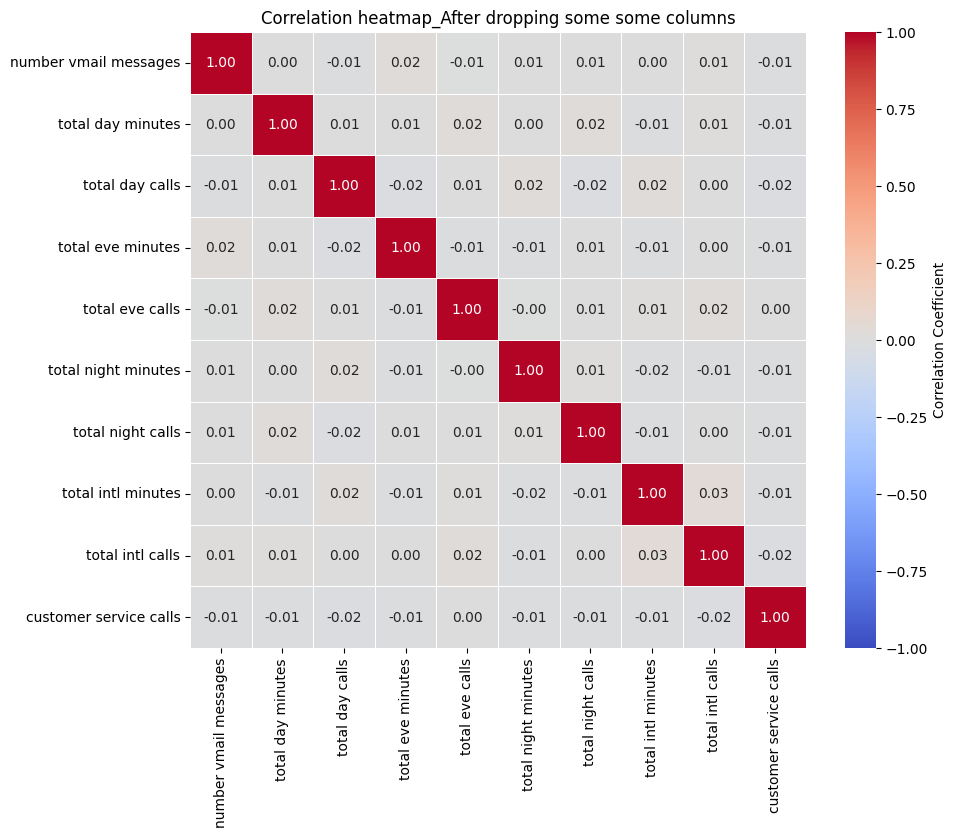

In [132]:
# Creating a correlation heatmap-after dropping the columns the model will not use.
numeric_df = df[numeric_columns]

#calculating correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))   # to adjust size

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap= 'coolwarm',
    vmin=-1,vmax=1,
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation heatmap_After dropping some some columns')
plt.show()

- From the heat map, the columns , there are columns with very strong correlation.  For example, total day minutes, total evening minutes, total night minute, and total international minutes.

- To also avoid multicollinarity, we will drop one column fro each pair to reduce multicllinearity.

- The columns to be dropped will be,total day charge, total evening charge, total night charge, and total international charge
- The heatmap after dropping some columns has not reduced the multicollinearity that was there before.
- Although dropping the columns might not do alot for the model since the columns were mainly redudant.

## 4.0. Separating Target & Predictors

In [133]:
# Separating target and predictors

#Target
y = df["churn"].copy()

#Features
X = df.drop(columns="churn")


## 5.0.Preprocessing & Feature Engineering

5.1.Splitting the data into train and test

In [134]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

In [135]:
print("X_train Shape:", X_train.shape)

X_train Shape: (2333, 12)


In [136]:
print("X_test Shape:", X_test.shape)

X_test Shape: (1000, 12)


5.2. Column Transformer(for scaling numeric feautures and encoding categoricals)

In [137]:
# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numeric_columns),
        ("cat",OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_columns)
    
    ])

In [138]:
X_train_processed = preprocessor.fit_transform(X_train)

In [139]:
X_test_processed = preprocessor.transform(X_test)

## 6.0.Model Building & Comparison.

Under modeli building and comparison, the models are going to be trained and predicted. Also each model is going to have a classification report, confusion matrix and ROC curve

6.1. Baseline Model : Logistic Regression

In [140]:
# Logistic Regression

#Create the first Instance of Logistic Regression
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train_processed,y_train)

# Evaluating the model
y_pred_logreg = logreg.predict(X_test_processed)

- In this step, we will get the actual performance numbers for each score(recall, f1 score, accuracy and precision)

In [141]:
recall_logreg = recall_score(y_test,y_pred_logreg)
precision_logreg = precision_score(y_test,y_pred_logreg)
f1_score_logreg = f1_score(y_test,y_pred_logreg)
accuracy_logreg = accuracy_score(y_test,y_pred_logreg)

recall_logreg, precision_logreg,f1_score_logreg,accuracy_logreg

(0.21678321678321677, 0.5740740740740741, 0.3147208121827411, 0.865)

In [142]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_logreg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_logreg))

              precision    recall  f1-score   support

       False       0.88      0.97      0.93       857
        True       0.57      0.22      0.31       143

    accuracy                           0.86      1000
   macro avg       0.73      0.59      0.62      1000
weighted avg       0.84      0.86      0.84      1000


Confusion Matrix:
[[834  23]
 [112  31]]


We now have our performamce score and  classification report for our firt model.

- For our Churn=1, all the performance metrics scores are low. For examplem the precision is 57%, a bit moderate.

- Recall is only 22% meaning that our model misses to catch 78% of the churnes(customers who will eventally leave SyriaTel)

- F1-score is also abit low.

- Accuracy is 86% however the data has class Imbalance.

ROC AUC for Logistic Regression:0.8300


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

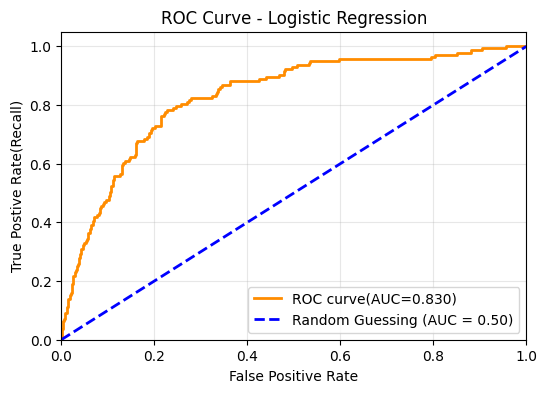

In [143]:
# getiing class predictions(0/1)
y_pred_logreg = logreg.predict(X_test_processed)

# prob of churn probabillites for ROC
y_pred_logreg = logreg.predict_proba(X_test_processed)[:, 1]

# computing AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_logreg)

#computing ROC curve
auc = roc_auc_score(y_test,y_pred_logreg)
print(f"ROC AUC for Logistic Regression:{auc:.4f}")

# plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=2,
         label = f'ROC curve(AUC={auc:.3f})')

plt.plot([0,1],[0,1], color='blue',lw=2,linestyle='--',
         label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate(Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc ="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout


6.2.Tuned Logistic Regression

In [144]:
# Tuned Logistic Regression

#Create the first Instance of Logistic Regression
logreg_tuned = LogisticRegression(C=10,max_iter=1000,random_state=42)

# fit the model
logreg_tuned.fit(X_train_processed,y_train)

# Evaluating the model
y_pred_logreg_tuned = logreg_tuned.predict(X_test_processed)

In [145]:
recall_logreg_tuned = recall_score(y_test,y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test,y_pred_logreg_tuned)
f1_score_logreg_tuned= f1_score(y_test,y_pred_logreg_tuned)
accuracy_logreg_tuned= accuracy_score(y_test,y_pred_logreg_tuned)

recall_logreg_tuned, precision_logreg_tuned,f1_score_logreg_tuned,accuracy_logreg_tuned

(0.21678321678321677, 0.5740740740740741, 0.3147208121827411, 0.865)

In [146]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_logreg_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_logreg_tuned))

              precision    recall  f1-score   support

       False       0.88      0.97      0.93       857
        True       0.57      0.22      0.31       143

    accuracy                           0.86      1000
   macro avg       0.73      0.59      0.62      1000
weighted avg       0.84      0.86      0.84      1000


Confusion Matrix:
[[834  23]
 [112  31]]


ROC AUC for Tuned Logistic Regression:0.8306


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

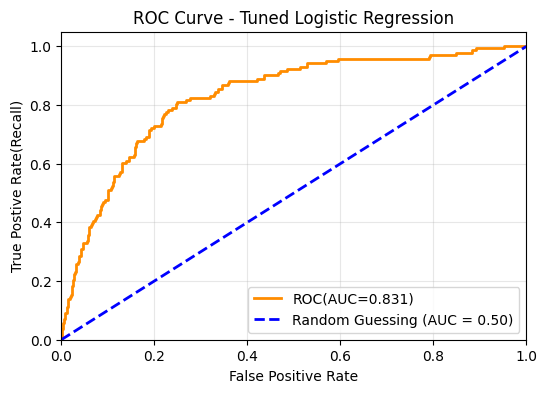

In [ ]:
# ROC CURVE FOR THE TUNED LOGISTIC REGRESSION
# Computing ROC curve for the tuned losistic regression
y_pred_logreg_tuned = logreg_tuned.predict(X_test_processed)

# prob of churn probabillites for ROC
y_pred_logreg_tuned = logreg_tuned.predict_proba(X_test_processed)[:, 1]

# computing AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_logreg_tuned)

#computing ROC curve
auc_logreg_tuned = roc_auc_score(y_test,y_pred_logreg_tuned)
print(f"ROC AUC for Tuned Logistic Regression:{auc_logreg_tuned:.4f}")

# plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=2,
         label = f'ROC(AUC={auc_logreg_tuned:.3f})')

plt.plot([0,1],[0,1], color='blue',lw=2,linestyle='--',
         label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate(Recall)')
plt.title('ROC Curve - Tuned Logistic Regression')
plt.legend(loc ="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout


There is a very small improvement in performance values between my baseline Logistic Regression model and the tuned Logistic Regression.

6.3: Decision Tree Classifier

In [148]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_processed,y_train)

# predictions
y_pred_dt = dt.predict(X_test_processed)

In [149]:
# Evaluating our dt model
recall_dt = recall_score(y_test,y_pred_dt)
precision_dt = precision_score(y_test,y_pred_dt)
f1_score_dt= f1_score(y_test,y_pred_dt)
accuracy_dt= accuracy_score(y_test,y_pred_dt)

recall_dt, precision_dt,f1_score_dt,accuracy_dt

(0.7132867132867133, 0.7083333333333334, 0.710801393728223, 0.917)

In [150]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_dt))

              precision    recall  f1-score   support

       False       0.95      0.95      0.95       857
        True       0.71      0.71      0.71       143

    accuracy                           0.92      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.92      0.92      0.92      1000


Confusion Matrix:
[[815  42]
 [ 41 102]]


ROC AUC for Decision Tree:0.8321


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

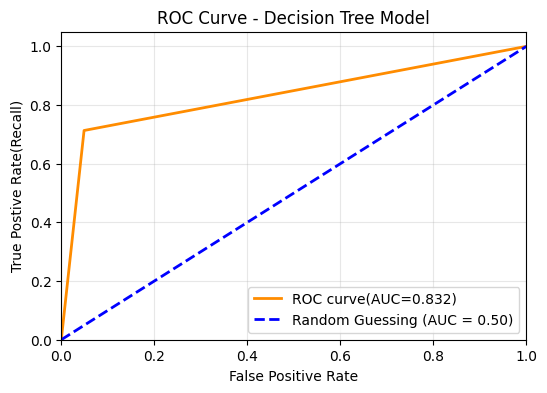

In [151]:
# Computing ROC curve for Decision Tree
y_pred_dt = dt.predict(X_test_processed)

y_pred_dt = dt.predict_proba(X_test_processed)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_pred_dt)

# plotting the ROC curve
auc_dt = roc_auc_score(y_test,y_pred_dt)
print(f"ROC AUC for Decision Tree:{auc_dt:.4f}")

# plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=2,
         label = f'ROC curve(AUC={auc_dt:.3f})')

plt.plot([0,1],[0,1], color='blue',lw=2,linestyle='--',
         label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate(Recall)')
plt.title('ROC Curve - Decision Tree Model')
plt.legend(loc ="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout

Tuned Decision Tree

In [152]:
dt_tuned = DecisionTreeClassifier(
    criterion= 'gini',
    splitter ='best',
    max_depth=6,
    min_samples_split = 12,
    min_samples_leaf = 15,
    random_state=42,
    class_weight = 'balanced',
    max_features = None,

)

dt_tuned.fit(X_train_processed, y_train)

y_pred_dt_tuned = dt_tuned.predict(X_test_processed)

In [153]:
# Evaluating the tuned Decision Tree Model
recall_dt_tuned = recall_score(y_test,y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test,y_pred_dt_tuned)
f1_score_dt_tuned= f1_score(y_test,y_pred_dt_tuned)
accuracy_dt_tuned= accuracy_score(y_test,y_pred_dt_tuned)

recall_dt_tuned, precision_dt_tuned,f1_score_dt_tuned,accuracy_dt_tuned

(0.7972027972027972, 0.6826347305389222, 0.7354838709677419, 0.918)

In [154]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_dt_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_dt_tuned))

              precision    recall  f1-score   support

       False       0.97      0.94      0.95       857
        True       0.68      0.80      0.74       143

    accuracy                           0.92      1000
   macro avg       0.82      0.87      0.84      1000
weighted avg       0.92      0.92      0.92      1000


Confusion Matrix:
[[804  53]
 [ 29 114]]


ROC AUC for Decision Tree:0.8677


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

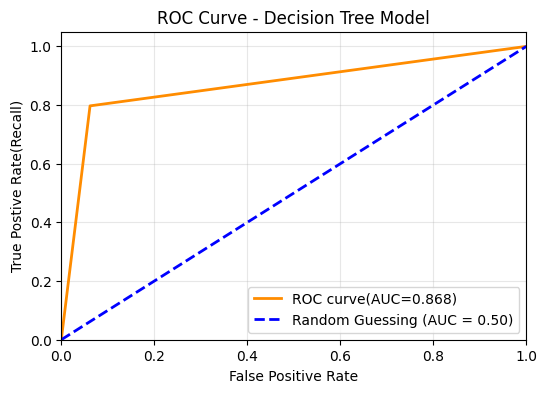

In [158]:
# Computing ROC curve for tuned Decsion Tree
y_pred_dt_tuned = dt_tuned.predict(X_test_processed)

y_prob_dt_tuned = dt_tuned.predict_proba(X_test_processed)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_pred_dt_tuned)

# plotting the ROC curve
auc_dt_tuned = roc_auc_score(y_test,y_pred_dt_tuned)
print(f"ROC AUC for Decision Tree:{auc_dt_tuned:.4f}")

# plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=2,
         label = f'ROC curve(AUC={auc_dt_tuned:.3f})')

plt.plot([0,1],[0,1], color='blue',lw=2,linestyle='--',
         label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate(Recall)')
plt.title('ROC Curve - Decision Tree Model')
plt.legend(loc ="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout

## Model Evaluation

Summary Comparison Table

In [159]:
model_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Tuned Logistic Regression",
        "Decision Tree",
        "Tuned Decsion Tree"
    ],
    "Recall": [
        recall_logreg,
        recall_logreg_tuned,
        recall_dt,
        recall_dt_tuned
    ],
    "Precision": [
        precision_logreg,
        precision_logreg_tuned,
        precision_dt,
        precision_dt_tuned
    ],
      "F1 Score": [
        f1_score_logreg,
        f1_score_logreg_tuned,
        f1_score_dt,
        f1_score_dt_tuned
    ],
     "Accuracy": [
        accuracy_logreg,
        accuracy_logreg_tuned,
        accuracy_dt,
        accuracy_dt_tuned
     ],
     "ROC AUC": [
        auc,
        auc_logreg_tuned,
        auc_dt,
        auc_dt_tuned
     ]
})

model_results

,Model,Recall,Precision,F1 Score,Accuracy,ROC AUC
0,Logistic Regression,0.216783,0.574074,0.314721,0.865,0.830005
1,Tuned Logistic Regression,0.216783,0.574074,0.314721,0.865,0.830609
2,Decision Tree,0.713287,0.708333,0.710801,0.917,0.832139
3,Tuned Decsion Tree,0.797203,0.682635,0.735484,0.918,0.867680


Combined Multi Model ROC Curve

ROC AUC for Decision Tree:0.8677


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

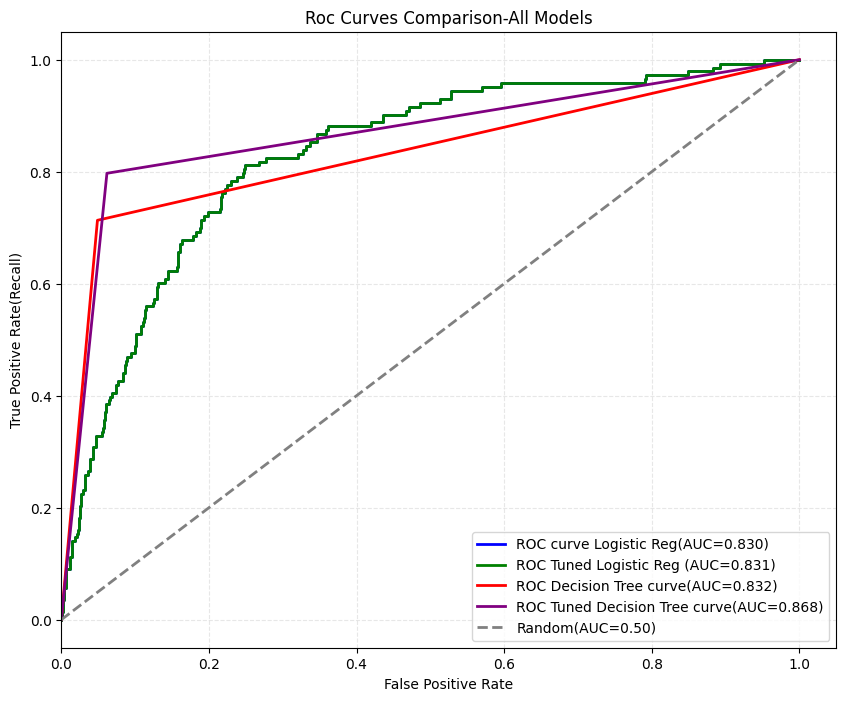

In [165]:
plt.figure(figsize=(10,8))

# 1.Baseline Logistic Regression
fpr, tpr, _ = roc_curve(y_test,y_pred_logreg_tuned)
auc = roc_auc_score(y_test,y_pred_logreg)
plt.plot(fpr,tpr, color='blue',lw=2,
         label = f'ROC curve Logistic Reg(AUC={auc:.3f})')

# 2.Tuned Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test,y_pred_logreg_tuned)
auc_logreg_tuned = roc_auc_score(y_test,y_pred_logreg_tuned)
plt.plot(fpr,tpr, color='green',lw=2,
         label = f'ROC Tuned Logistic Reg (AUC={auc_logreg_tuned:.3f})')

# Decision Tree
fpr, tpr, thresholds = roc_curve(y_test,y_pred_dt)
auc_dt = roc_auc_score(y_test,y_pred_dt)
plt.plot(fpr,tpr, color='red',lw=2,
         label = f'ROC Decision Tree curve(AUC={auc_dt:.3f})')


# Tuned Decision Tree
fpr, tpr, thresholds = roc_curve(y_test,y_pred_dt_tuned)
auc_dt_tuned = roc_auc_score(y_test,y_pred_dt_tuned)
print(f"ROC AUC for Decision Tree:{auc_dt_tuned:.4f}")
plt.plot(fpr,tpr, color='purple',lw=2,
         label = f'ROC Tuned Decision Tree curve(AUC={auc_dt_tuned:.3f})')

# Random guessing line
plt.plot([0,1],[0,1],color='gray', lw=2,linestyle='--',label='Random(AUC=0.50)')


# Formatting
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('Roc Curves Comparison-All Models')
plt.legend(loc="lower right",fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout


Confusion Matrix for Best Model

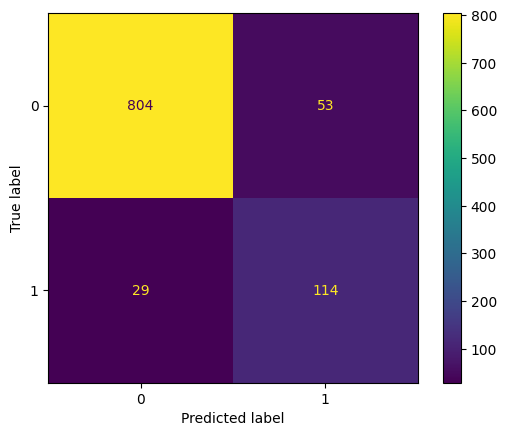

True Negatives:29,False Positivies:114
False Negatives:53,True Positivies:804


In [166]:
# Confusion Matrix for our best and final model(Tuned Decision Model)
cm = confusion_matrix(y_test, y_pred_dt_tuned)
cm_labels = ['No Churn', 'Churn']

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

# TP,FN,TN,FP counts
tp,fn,tn,fp =cm.ravel()
print(f"True Negatives:{tn},False Positivies:{fp}")
print(f"False Negatives:{fn},True Positivies:{tp}")


In [ ]:
TP- Means that the model predicted the customers churned and they actually churned.
TN - Means that the model predicted the customers did not churn when they actually did not churn.
FN- means that the model predicted that the customer did not churn when they infact did churn.
FP - Means tha the model predicted the custmer churned when they actually did not churn.

## 7.Interpration and Model Selection

For SyriaTel, we are more focused on identifying the churners early who are a potential revenue loss to the company before they actually churn. 
